In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("custom.css", "r").read()
    return HTML(styles)
css_styling()

In [2]:
# Load Pandas into Python
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

In [3]:
# Read cleant data
csv_path = 'cleant_data.csv'
reviews_cleant = pd.read_csv(csv_path)

In [4]:
reviews_cleant.Text[0]

"In June<br />I saw a charming group<br />of roses all begin<br />to droop<br />I pepped them up<br />with chicken soup!<br />Sprinkle once<br />sprinkle twice<br />sprinkle chicken soup<br />with rice<br /><br />This is a great book to teach children the months of the year. The repetition of the phrases and the funny little stories with accompanying pictures make for an ideal bedtime read. This isn't nearly as good as some of Sendak's other books (like Where the Wild Things are or Pierre: The Boy Who Didn't Care), but it still carries his unique brand of charm."

## Feature engineering: adding sentiment analysis from other methods

### Method 1: SpaCy

In [14]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

In [27]:
# Process one sample review
text = reviews_cleant.CleantText[150525]
doc = nlp(text)

In [26]:
reviews_cleant.Score[200]

5

In [30]:
doc._.blob.polarity

0.06851851851851852

In [ ]:
# Takes too long
reviews_cleant['spacy_sa'] = reviews_cleant['CleantText'].apply(lambda x: nlp(x)._.blob.polarity)

In [73]:
reviews_small['spacy_sa'] = reviews_small['CleantText'].apply(lambda x: nlp(x)._.blob.polarity)

C:\Users\jordi.burgues.miro\AppData\Local\Temp\ipykernel_14788\217433704.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_small['spacy_sa'] = reviews_small['CleantText'].apply(lambda x: nlp(x)._.blob.polarity)


### Method 2: NLTK

In [40]:
# SA with NLTK
# Download lexicon
import nltk
nltk.download(['vader_lexicon'])

from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
sia.polarity_scores(reviews_cleant.CleantText[146372])['compound']

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jordi.burgues.miro\AppData\Roaming\nltk_data.
[nltk_data]     ..
[nltk_data]   Package vader_lexicon is already up-to-date!


0.9617

In [41]:
reviews_small = reviews_cleant[0:1000]

In [42]:
# Test with smaller batch
reviews_small['nltk_sa_pos'] = reviews_small['CleantText'].apply(lambda x: sia.polarity_scores(x)['pos'])

C:\Users\jordi.burgues.miro\AppData\Local\Temp\ipykernel_14788\3613569123.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_small['nltk_sa'] = reviews_small['CleantText'].apply(lambda x: sia.polarity_scores(x)['compound'])


In [ ]:
reviews_small['nltk_sa_neg'] = reviews_small['CleantText'].apply(lambda x: sia.polarity_scores(x)['neg'])

In [45]:
reviews_small[reviews_small['Score'] <= 3].head(2)

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,DateTime,Popularity,Year,binary_score,CleantText,Text_SWR,spacy_sa,nltk_sa
10,150496,150497,0006641040,A1HKYQOFC8ZZCH,"Maria Apolloni ""lanarossa""",2,2,1,1334707200,"The story is great, the softcover book is disa...",I give five stars to the Maurice Sendak story....,2012-04-18 02:00:00,0,2012,0,i give five stars to the maurice sendak story ...,give five stars maurice sendak story one star ...,0,-0.4767
12,150494,150495,0006641040,A2QXYSXGQ2PKAU,Support for Providers,3,3,3,1129507200,Disappointed,When I ordered a large amount of these books t...,2005-10-17 02:00:00,0,2005,0,when i ordered a large amount of these books t...,ordered large amount books share child care pr...,0,0.6712


In [ ]:
# Apply NLTK to all set
reviews_cleant['nltk_sa'] = reviews_cleant['CleantText'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [51]:
reviews_cleant.drop(['spacy_sa'], axis=1, inplace=True)

In [56]:
reviews_cleant

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,DateTime,Popularity,Year,binary_score,CleantText,Text_SWR
0,150528,150529,0006641040,A25ACLV5KPB4W,"Matt Hetling ""Matt""",0,1,4,1108425600,"Nice cadence, catchy rhymes",In June<br />I saw a charming group<br />of ro...,2005-02-15 01:00:00,-1,2005,1,in june i saw a charming group of roses all be...,june saw charming group roses begin droop pepp...
1,150506,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,4,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...,2007-10-04 02:00:00,0,2007,1,this is a fun way for children to learn their ...,fun way children learn months year learn poems...
2,150505,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,4,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",2007-11-11 01:00:00,0,2007,1,i grew up reading these sendak books and watch...,grew reading sendak books watching really rosi...
3,150504,150505,0006641040,A2PTSM496CF40Z,"Jason A. Teeple ""Nobody made a greater mistak...",1,1,4,1210809600,A classic,Get the movie or sound track and sing along wi...,2008-05-15 02:00:00,0,2008,1,get the movie or sound track and sing along wi...,get movie sound track sing along carol king gr...
4,150503,150504,0006641040,AQEYF1AXARWJZ,"Les Sinclair ""book maven""",1,1,4,1212278400,Chicken Soup with Rice,A very entertaining rhyming story--cleaver and...,2008-06-01 02:00:00,0,2008,1,a very entertaining rhyming storycleaver and c...,entertaining rhyming storycleaver catchythe il...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393587,193171,193172,B009RSR8HO,A3JJTHP8T7A8LY,"Joanne Eklund ""Joanne""",0,0,5,1350432000,Zero,FTS Zero is the best sweetener I have ever tri...,2012-10-17 02:00:00,0,2012,1,fts zero is the best sweetener i have ever tri...,fts zero best sweetener ever tried aftertaste ...
393588,188388,188389,B009SF0TN6,A1L0GWGRK4BYPT,Bety Robinson,0,0,5,1350518400,Amazing!! Great sauce for everything!,You have to try this sauce to believe it! It s...,2012-10-18 02:00:00,0,2012,1,you have to try this sauce to believe it it st...,try sauce believe starts little sweet honey ta...
393589,221794,221795,B009SR4OQ2,A32A6X5KCP7ARG,sicamar,1,1,5,1350604800,Awesome Taste,I bought this Hazelnut Paste (Nocciola Spread)...,2012-10-19 02:00:00,0,2012,1,i bought this hazelnut paste nocciola spread a...,bought hazelnut paste nocciola spread local sh...
393590,5702,5703,B009WSNWC4,AMP7K1O84DH1T,ESTY,0,0,5,1351209600,DELICIOUS,Purchased this product at a local store in NY ...,2012-10-26 02:00:00,0,2012,1,purchased this product at a local store in ny ...,purchased product local store kids love quick ...


## Preprocessing Summary

In [138]:
# Preprocessing and tokenization functions
import re
import nltk
from nltk.tokenize import RegexpTokenizer 
from nltk.stem import WordNetLemmatizer,PorterStemmer, SnowballStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer, SnowballStemmer

lemmatizer = WordNetLemmatizer()
stemmer = SnowballStemmer('english') 

#Removing the word 'not' from stopwords
default_stopwords = set(stopwords.words('english'))
#excluding some useful words from stop words list as we doing sentiment analysis
excluding = set(['against','not','don', "don't",'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't",
             'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 
             'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't",'shouldn', "shouldn't", 'wasn',
             "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"])

custom_stopwords = default_stopwords - excluding

def preprocess(sentence):
 
    sentence = str(sentence)
    sentence = sentence.lower()
    # sentence = sentence.replace('{html}',"") 
    # For Regex Pattern Object
    cleanr = re.compile(r'<\s*[^>]*\s*>')
    cleantext = re.sub(cleanr, ' ', sentence)
    rem_hyp = re.sub(r'(\w+)-(\w+)', r'\1 \2', cleantext)
    rem_punc = re.sub(r'[^\w\s]', '', rem_hyp)
    # re_clean = re.sub(r'[^a-z0-9A-Z_]',' ', cleantext)
    rem_http = re.sub(r'http\S+', '', rem_punc)
    rem_url = re.sub(r"www.\S+", " ", rem_http)
    rem_pat = re.sub("\s*\b(?=\w*(\w)\1{2,})\w*\b",' ', rem_url)
    rem_num = re.sub('[0-9]+', '', rem_pat)

    return rem_num

def tokenize_data(text):
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)  
    return tokens

def remove_stop_words(cleant_text):
    
    tokens = tokenize_data(cleant_text)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in custom_stopwords]
    stem_words = [stemmer.stem(w) for w in filtered_words]
    lemma_words = [lemmatizer.lemmatize(w) for w in stem_words]
    
    return " ".join(filtered_words)

def prepare_text(text):
    
    cleant_text = preprocess(text)
    remove_sw = remove_stop_words(cleant_text)

    return remove_sw

In [70]:
reviews_cleant.Summary[20]

'This book is much too small'

In [69]:
prepare_text(reviews_cleant.Summary[20])

'book much small'

In [71]:
reviews_cleant['CleantSummary'] = reviews_cleant['Summary'].apply(lambda x:prepare_text(x))

In [72]:
reviews_cleant

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,DateTime,Popularity,Year,binary_score,CleantText,Text_SWR,CleantSummary
0,150528,150529,0006641040,A25ACLV5KPB4W,"Matt Hetling ""Matt""",0,1,4,1108425600,"Nice cadence, catchy rhymes",In June<br />I saw a charming group<br />of ro...,2005-02-15 01:00:00,-1,2005,1,in june i saw a charming group of roses all be...,june saw charming group roses begin droop pepp...,nice cadence catchy rhymes
1,150506,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,4,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...,2007-10-04 02:00:00,0,2007,1,this is a fun way for children to learn their ...,fun way children learn months year learn poems...,chicken soup rice months
2,150505,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,4,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",2007-11-11 01:00:00,0,2007,1,i grew up reading these sendak books and watch...,grew reading sendak books watching really rosi...,love book miss hard cover version
3,150504,150505,0006641040,A2PTSM496CF40Z,"Jason A. Teeple ""Nobody made a greater mistak...",1,1,4,1210809600,A classic,Get the movie or sound track and sing along wi...,2008-05-15 02:00:00,0,2008,1,get the movie or sound track and sing along wi...,get movie sound track sing along carol king gr...,classic
4,150503,150504,0006641040,AQEYF1AXARWJZ,"Les Sinclair ""book maven""",1,1,4,1212278400,Chicken Soup with Rice,A very entertaining rhyming story--cleaver and...,2008-06-01 02:00:00,0,2008,1,a very entertaining rhyming storycleaver and c...,entertaining rhyming storycleaver catchythe il...,chicken soup rice
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393587,193171,193172,B009RSR8HO,A3JJTHP8T7A8LY,"Joanne Eklund ""Joanne""",0,0,5,1350432000,Zero,FTS Zero is the best sweetener I have ever tri...,2012-10-17 02:00:00,0,2012,1,fts zero is the best sweetener i have ever tri...,fts zero best sweetener ever tried aftertaste ...,zero
393588,188388,188389,B009SF0TN6,A1L0GWGRK4BYPT,Bety Robinson,0,0,5,1350518400,Amazing!! Great sauce for everything!,You have to try this sauce to believe it! It s...,2012-10-18 02:00:00,0,2012,1,you have to try this sauce to believe it it st...,try sauce believe starts little sweet honey ta...,amazing great sauce everything
393589,221794,221795,B009SR4OQ2,A32A6X5KCP7ARG,sicamar,1,1,5,1350604800,Awesome Taste,I bought this Hazelnut Paste (Nocciola Spread)...,2012-10-19 02:00:00,0,2012,1,i bought this hazelnut paste nocciola spread a...,bought hazelnut paste nocciola spread local sh...,awesome taste
393590,5702,5703,B009WSNWC4,AMP7K1O84DH1T,ESTY,0,0,5,1351209600,DELICIOUS,Purchased this product at a local store in NY ...,2012-10-26 02:00:00,0,2012,1,purchased this product at a local store in ny ...,purchased product local store kids love quick ...,delicious


## Modelling

In [76]:
corr = reviews_cleant.corr()
corr.style.background_gradient(cmap='coolwarm')

C:\Users\jordi.burgues.miro\AppData\Local\Temp\ipykernel_14788\1384582331.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = reviews_cleant.corr()


,Unnamed: 0,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Popularity,Year,binary_score
Unnamed: 0,1.000000,1.000000,0.001909,0.001395,0.010869,0.006900,0.001366,0.006185,0.011024
Id,1.000000,1.000000,0.001909,0.001395,0.010869,0.006900,0.001366,0.006185,0.011024
HelpfulnessNumerator,0.001909,0.001909,1.000000,0.969101,-0.035958,-0.176952,-0.225585,-0.174868,-0.032737
HelpfulnessDenominator,0.001395,0.001395,0.969101,1.000000,-0.104350,-0.194560,-0.458922,-0.192047,-0.095008
Score,0.010869,0.010869,-0.035958,-0.104350,1.000000,-0.063420,0.282620,-0.062786,0.914142
Time,0.006900,0.006900,-0.176952,-0.194560,-0.063420,1.000000,0.131055,0.982913,-0.060219
Popularity,0.001366,0.001366,-0.225585,-0.458922,0.282620,0.131055,1.000000,0.128639,0.257324
Year,0.006185,0.006185,-0.174868,-0.192047,-0.062786,0.982913,0.128639,1.000000,-0.059606
binary_score,0.011024,0.011024,-0.032737,-0.095008,0.914142,-0.060219,0.257324,-0.059606,1.000000


In [80]:
reviews_cleant
# Id, ProductId is not relevant to classify a review
# UserId may not be important either
# ProfileName too
# HelpfulnessNumerator and Denominator could be removed
# Score, Time, Summary, Text, DateTime, Popularityh must be removed

# To keep:
# binary score, text_swr, cleant_summary
reviews_cleant.columns

Index(['Unnamed: 0', 'Id', 'ProductId', 'UserId', 'ProfileName',
       'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time',
       'Summary', 'Text', 'DateTime', 'Popularity', 'Year', 'binary_score',
       'CleantText', 'Text_SWR', 'CleantSummary'],
      dtype='object')

In [83]:
reviews_model = reviews_cleant.drop(['Unnamed: 0', 'Id', 'ProductId', 'UserId', 'ProfileName',
       'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time',
       'Summary', 'Text', 'DateTime', 'Popularity', 'Year',
       'CleantText'], axis=1)

In [89]:
reviews_model

,binary_score,Text_SWR,CleantSummary
0,1,june saw charming group roses begin droop pepp...,nice cadence catchy rhymes
1,1,fun way children learn months year learn poems...,chicken soup rice months
2,1,grew reading sendak books watching really rosi...,love book miss hard cover version
3,1,get movie sound track sing along carol king gr...,classic
4,1,entertaining rhyming storycleaver catchythe il...,chicken soup rice
...,...,...,...
393587,1,fts zero best sweetener ever tried aftertaste ...,zero
393588,1,try sauce believe starts little sweet honey ta...,amazing great sauce everything
393589,1,bought hazelnut paste nocciola spread local sh...,awesome taste
393590,1,purchased product local store kids love quick ...,delicious


## Model 1: using just TextSWR (binary) [0.83]

In [56]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB         # Naive Bayes
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

### Define train test split

In [204]:
# Define training datat and labels
X = reviews_model['Text_SWR']
y = reviews_model['binary_score']

# Split the new DataFrame into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 ,random_state=99)

In [205]:
y_train.value_counts()

1    214688
0     60824
Name: binary_score, dtype: int64

In [206]:
y_test.value_counts()

1    92074
0    26003
Name: binary_score, dtype: int64

In [207]:
reviews_model.dropna(inplace=True)

### Encode reviews with CountVectorizer()

In [208]:
# Use CountVectorizer to convert reviews into matrices
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)

# equivalent to:
# vect.fit(X_train) # words that are on the training set
# X_train_dtm = vect.transform(X_train)

# Perform the same in test
X_test_dtm = vect.transform(X_test)

In [209]:
X_train_dtm.shape, X_test_dtm.shape

((275512, 142296), (118077, 142296))

### Use CountVectorizer in Model

In [210]:
# Use Naive Bayes to predict binary score
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

# Calculate accuracy.
print((metrics.accuracy_score(y_test, y_pred_class)))

0.8709909635238022


In [211]:
y_test.value_counts()

1    92074
0    26003
Name: binary_score, dtype: int64

In [212]:
confusion_matrix(y_test, y_pred_class)

array([[17212,  8791],
       [ 6442, 85632]], dtype=int64)

In [213]:
# WHEN BINARY CLASSIFIER DOES HAVE ELEMENTS WITH SCORE == 3, included within class 0 (negative)
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.73      0.66      0.69     26003
           1       0.91      0.93      0.92     92074

    accuracy                           0.87    118077
   macro avg       0.82      0.80      0.81    118077
weighted avg       0.87      0.87      0.87    118077



In [276]:
# WHEN BINARY CLASSIFIER DOES NOT HAVE ELEMENTS WITH SCORE == 3
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.76      0.66      0.71     17129
           1       0.94      0.96      0.95     92021

    accuracy                           0.91    109150
   macro avg       0.85      0.81      0.83    109150
weighted avg       0.91      0.91      0.91    109150



Text(50.722222222222214, 0.5, 'Original class')

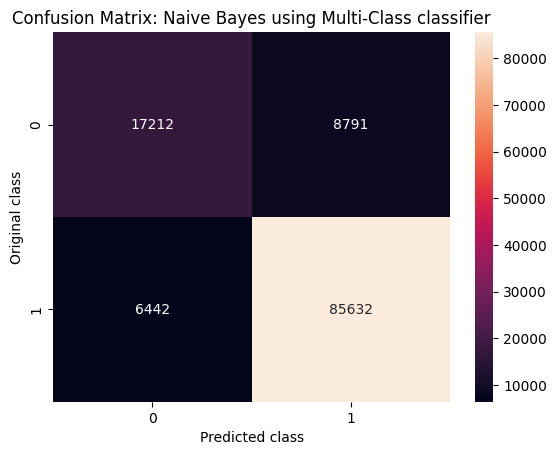

In [214]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred_class), annot=True, fmt='d')
plt.title("Confusion Matrix: Naive Bayes using Multi-Class classifier")
plt.xlabel('Predicted class')
plt.ylabel('Original class')

### Compute Accuracy using Tokenization

In [141]:
def tokenize_test(vect):
    X_train_dtm = vect.fit_transform(X_train)
    print(('Features: ', X_train_dtm.shape[1]))
    X_test_dtm = vect.transform(X_test)
    nb = MultinomialNB()
    nb.fit(X_train_dtm, y_train)
    y_pred_class = nb.predict(X_test_dtm)
    print(('Accuracy: ', metrics.accuracy_score(y_test, y_pred_class)))

In [142]:
tokenize_test(vect)

('Features: ', 142296)
('Accuracy: ', 0.8709909635238022)


## Model 2: using just CleantSummary (binary) [0.79]

In [197]:
# Define training datat and labels
X = reviews_model['CleantSummary']
y = reviews_model['binary_score']

# Split the new DataFrame into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 ,random_state=99)

In [198]:
# Use CountVectorizer to convert reviews into matrices
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)

# equivalent to:
# vect.fit(X_train) # words that are on the training set
# X_train_dtm = vect.transform(X_train)

# Perform the same in test
X_test_dtm = vect.transform(X_test)

In [199]:
# Use Naive Bayes to predict binary score
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

# Calculate accuracy.
print((metrics.accuracy_score(y_test, y_pred_class)))

0.8693225607019148


In [200]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.76      0.59      0.67     26003
           1       0.89      0.95      0.92     92074

    accuracy                           0.87    118077
   macro avg       0.83      0.77      0.79    118077
weighted avg       0.86      0.87      0.86    118077



In [201]:
metrics.f1_score(y_test, y_pred_class, average='weighted')

0.8632314649532848

Text(50.722222222222214, 0.5, 'Original class')

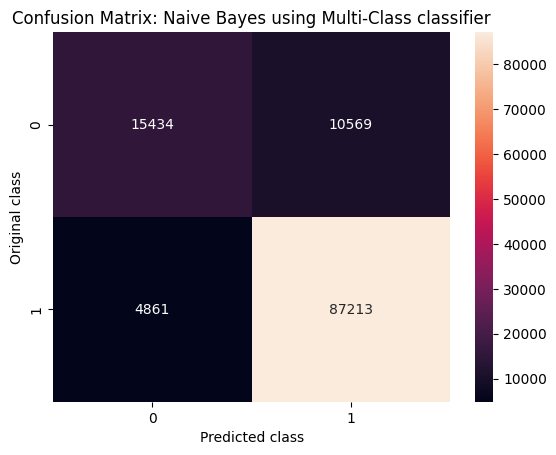

In [202]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred_class), annot=True, fmt='d')
plt.title("Confusion Matrix: Naive Bayes using Multi-Class classifier")
plt.xlabel('Predicted class')
plt.ylabel('Original class')

## Model 3: using just TextSWR and (multi-cass) [0.40]

In [235]:
reviews_model_mc = reviews_cleant.drop(['Unnamed: 0', 'Id', 'ProductId', 'UserId', 'ProfileName',
       'HelpfulnessNumerator', 'HelpfulnessDenominator', 'binary_score', 'Time',
       'Summary', 'Text', 'DateTime', 'Popularity', 'Year',
       'CleantText'], axis=1)

In [165]:
reviews_model_mc.Score.value_counts()

5    250730
4     56035
1     36279
3     29757
2     20791
Name: Score, dtype: int64

In [173]:
reviews_model_mc.isnull().sum()

Score            0
Text_SWR         3
CleantSummary    0
dtype: int64

In [174]:
reviews_model_mc.dropna(inplace=True)

In [175]:
# Define training datat and labels
X = reviews_model_mc['Text_SWR']
y = reviews_model_mc['Score']

# Split the new DataFrame into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 ,random_state=99)

In [176]:
y_train.value_counts(), y_test.value_counts()

(5    175479
 4     39209
 1     25443
 3     20815
 2     14566
 Name: Score, dtype: int64,
 5    75248
 4    16826
 1    10836
 3     8942
 2     6225
 Name: Score, dtype: int64)

In [177]:
# Use CountVectorizer to convert reviews into matrices
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)

# Perform the same in test
X_test_dtm = vect.transform(X_test)

In [178]:
# Use Naive Bayes to predict binary score
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

# Calculate accuracy.
print((metrics.accuracy_score(y_test, y_pred_class)))

0.6917773994935508


In [179]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           1       0.57      0.61      0.59     10836
           2       0.34      0.04      0.07      6225
           3       0.33      0.14      0.20      8942
           4       0.36      0.29      0.32     16826
           5       0.78      0.91      0.84     75248

    accuracy                           0.69    118077
   macro avg       0.48      0.40      0.40    118077
weighted avg       0.64      0.69      0.65    118077



In [180]:
metrics.f1_score(y_test, y_pred_class, average='weighted')

0.6535335417258479

Text(50.722222222222214, 0.5, 'Original class')

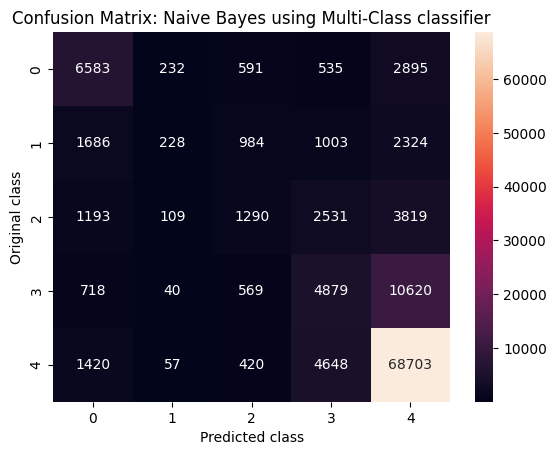

In [189]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred_class), annot=True, fmt='d')
plt.title("Confusion Matrix: Naive Bayes using Multi-Class classifier")
plt.xlabel('Predicted class')
plt.ylabel('Original class')

## Model 4: using just CleantSummary and (multi-cass)

In [216]:
# Define training datat and labels
X = reviews_model_mc['CleantSummary']
y = reviews_model_mc['Score']

# Split the new DataFrame into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 ,random_state=99)

# Use CountVectorizer to convert reviews into matrices
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)

# equivalent to:
# vect.fit(X_train) # words that are on the training set
# X_train_dtm = vect.transform(X_train)

# Perform the same in test
X_test_dtm = vect.transform(X_test)

# Use Naive Bayes to predict binary score
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

# Calculate accuracy.
print((metrics.accuracy_score(y_test, y_pred_class)))

0.6941910787028803


Text(50.722222222222214, 0.5, 'Original class')

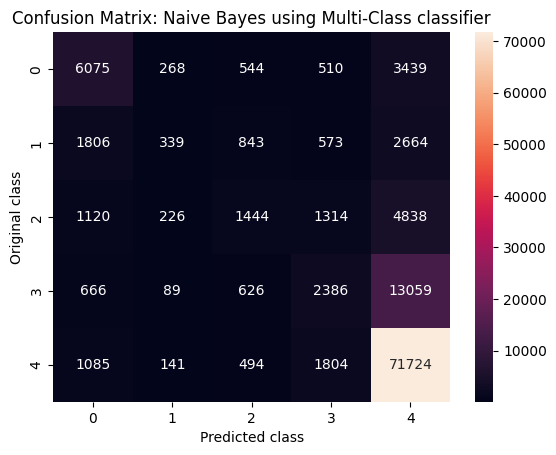

In [217]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred_class), annot=True, fmt='d')
plt.title("Confusion Matrix: Naive Bayes using Multi-Class classifier")
plt.xlabel('Predicted class')
plt.ylabel('Original class')

## Model 5: using just TextSWR and (multi-cass) [0.59]

In [85]:
reviews_model_mc

,Score,Text_SWR,tri_class_score
0,4,june saw charming group roses begin droop pepp...,2
1,4,fun way children learn months year learn poems...,2
2,4,grew reading sendak books watching really rosi...,2
3,4,get movie sound track sing along carol king gr...,2
4,4,entertaining rhyming storycleaver catchythe il...,2
...,...,...,...
393587,5,fts zero best sweetener ever tried aftertaste ...,2
393588,5,try sauce believe starts little sweet honey ta...,2
393589,5,bought hazelnut paste nocciola spread local sh...,2
393590,5,purchased product local store kids love quick ...,2


In [39]:
reviews_model_mc['tri_class_score'] = 0

In [40]:
reviews_model_mc.loc[reviews_model_mc['Score'] > 3,'tri_class_score'] = 2 # pos
reviews_model_mc.loc[reviews_model_mc['Score'] == 3,'tri_class_score'] = 1 # mix
reviews_model_mc.loc[reviews_model_mc['Score'] < 3,'tri_class_score'] = 0 # neg

In [41]:
reviews_model_mc.isnull().sum()

Score              0
Text_SWR           0
tri_class_score    0
dtype: int64

In [42]:
reviews_model_mc.dropna(inplace=True)

In [43]:
# Define training datat and labels
X = reviews_model_mc['Text_SWR']
y = reviews_model_mc['tri_class_score']

# Split the new DataFrame into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 ,random_state=99)

# Use CountVectorizer to convert reviews into matrices
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)

# equivalent to:
# vect.fit(X_train) # words that are on the training set
# X_train_dtm = vect.transform(X_train)

# Perform the same in test
X_test_dtm = vect.transform(X_test)

# Use Naive Bayes to predict binary score
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

# Calculate accuracy.
print((metrics.accuracy_score(y_test, y_pred_class)))

0.839680886201377


In [44]:
reviews_model_mc.tri_class_score.value_counts()

2    306762
0     57070
1     29757
Name: tri_class_score, dtype: int64

Text(50.722222222222214, 0.5, 'Original class')

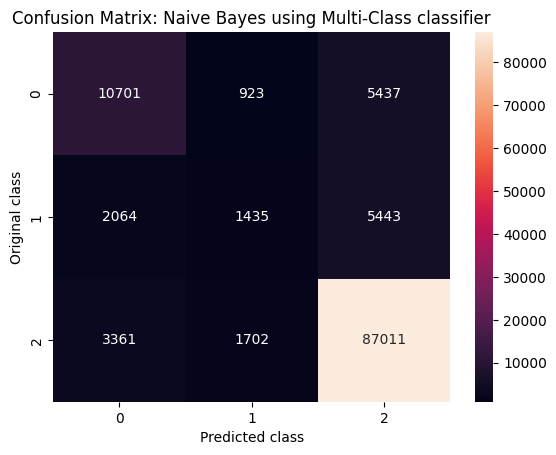

In [45]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred_class), annot=True, fmt='d')
plt.title("Confusion Matrix: Naive Bayes using Multi-Class classifier")
plt.xlabel('Predicted class')
plt.ylabel('Original class')

In [ ]:
# This model could be the best according all factors because:
    # It does not assign mixed reviews to class 0 (negative) nor it removes them (last classifier)
    # It works pretty decently on positive (2) and negative (0) classes
    # It clearly shows mixed reviews are, although equally, classified as any type of Score, in contrast to what happens with
        # positive and negative reviews

In [46]:
print(classification_report(y_test, y_pred_class))
# It looks like it's clear when a negative review or positive are such, but it's confusing on mixed reviews

              precision    recall  f1-score   support

           0       0.66      0.63      0.64     17061
           1       0.35      0.16      0.22      8942
           2       0.89      0.95      0.92     92074

    accuracy                           0.84    118077
   macro avg       0.64      0.58      0.59    118077
weighted avg       0.82      0.84      0.82    118077



## Model 6: using just TextSWR (binary, removing mixed reviews) [0.83]

In [8]:
reviews_model_mc = reviews_cleant.drop(['Unnamed: 0', 'Id', 'ProductId', 'UserId', 'ProfileName',
       'HelpfulnessNumerator', 'HelpfulnessDenominator', 'binary_score', 'Time',
       'Summary', 'Text', 'DateTime', 'Popularity', 'Year',
       'CleantText'], axis=1)

In [263]:
reviews_bin = reviews_model_mc[(reviews_model_mc['Score'] > 3) | (reviews_model_mc['Score'] < 3)]

In [260]:
reviews_bin.Score.value_counts()

5    250730
4     56035
1     36279
2     20791
Name: Score, dtype: int64

In [264]:
reviews_bin['bin_score']= 0


C:\Users\jordi.burgues.miro\AppData\Local\Temp\ipykernel_14788\3450657283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_bin['bin_score']= 0


In [265]:
reviews_bin.loc[reviews_bin['Score'] > 3,'bin_score'] = 1 # pos
reviews_bin.loc[reviews_bin['Score'] < 3,'bin_score'] = 0 # neg

In [267]:
reviews_bin.bin_score.value_counts()

1    306765
0     57070
Name: bin_score, dtype: int64

In [271]:
reviews_bin.dropna(inplace=True)

C:\Users\jordi.burgues.miro\AppData\Local\Temp\ipykernel_14788\1584717898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_bin.dropna(inplace=True)


0.9135135135135135


Text(50.722222222222214, 0.5, 'Original class')

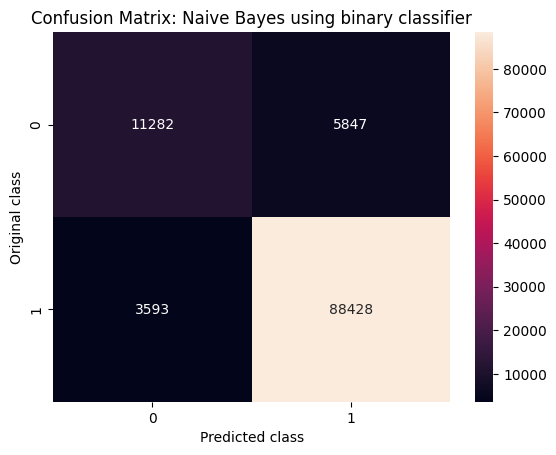

In [275]:
# Define training datat and labels
X = reviews_bin['Text_SWR']
y = reviews_bin['bin_score']

# Split the new DataFrame into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 ,random_state=99)

# Use CountVectorizer to convert reviews into matrices
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)

# Perform the same in test
X_test_dtm = vect.transform(X_test)

# Use Naive Bayes to predict binary score
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

# Calculate accuracy.
print((metrics.accuracy_score(y_test, y_pred_class)))

sns.heatmap(confusion_matrix(y_test, y_pred_class), annot=True, fmt='d')
plt.title("Confusion Matrix: Naive Bayes using binary classifier")
plt.xlabel('Predicted class')
plt.ylabel('Original class')

In [273]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.76      0.66      0.71     17129
           1       0.94      0.96      0.95     92021

    accuracy                           0.91    109150
   macro avg       0.85      0.81      0.83    109150
weighted avg       0.91      0.91      0.91    109150



In [274]:
metrics.f1_score(y_test, y_pred_class, average='weighted')

0.9109911493532648

## Model using Word2Vec as Vectorizer() [0.54]

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import numpy as np

In [12]:
# Get best 'dataset' to date
reviews_model_mc = reviews_cleant.drop(['Unnamed: 0', 'Id', 'ProductId', 'UserId', 'ProfileName',
       'HelpfulnessNumerator', 'HelpfulnessDenominator', 'binary_score', 'Time',
       'Summary', 'Text', 'DateTime', 'Popularity', 'Year',
       'CleantText'], axis=1)

In [13]:
# Drop Nans and reconfigure data
reviews_model_mc.dropna(inplace=True)
reviews_model_mc['tri_class_score'] = 0

reviews_model_mc.loc[reviews_model_mc['Score'] > 3,'tri_class_score'] = 2 # pos
reviews_model_mc.loc[reviews_model_mc['Score'] == 3,'tri_class_score'] = 1 # mix
reviews_model_mc.loc[reviews_model_mc['Score'] < 3,'tri_class_score'] = 0 # neg

In [35]:
# Define training datat and labels
X = reviews_model_mc['Text_SWR']
y = reviews_model_mc['tri_class_score']

# Split the new DataFrame into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 ,random_state=99)

In [36]:
y_train.value_counts(), y_test.value_counts()

(2    214688
 0     40009
 1     20815
 Name: tri_class_score, dtype: int64,
 2    92074
 0    17061
 1     8942
 Name: tri_class_score, dtype: int64)

In [37]:
# Create word embeddings using Word2Vec
tokenized_text = [word_tokenize(text.lower()) for text in X_train]
word2vec_model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=1, workers=4)

In [38]:
len(tokenized_text)

275512

In [41]:
def vectorize_text(text, model):
    tokens = word_tokenize(text.lower())
    vectorized = np.vstack([model.wv[token] for token in tokens if token in model.wv])
    
    if vectorized.size == 0:
        return np.zeros(model.vector_size, dtype=np.float32)
    
    return np.mean(vectorized, axis=0)

In [63]:
import numpy as np

def vectorize_text(text, model):
    tokens = word_tokenize(text.lower())
    
    # Create a set intersection to filter tokens in the model's vocabulary
    valid_tokens = set(tokens) & set(model.wv.key_to_index)
    
    if not valid_tokens:
        return np.zeros(model.vector_size, dtype=np.float32)
    
    # Use vstack to concatenate the word vectors
    vectorized = np.vstack(model.wv.get_vector(token) for token in valid_tokens)
    
    # Check if vectorized is empty before calculating the mean
    if vectorized.size == 0:
        return np.zeros(model.vector_size, dtype=np.float32)
    
    # Calculate the mean along the specified axis
    return np.mean(vectorized, axis=0)


In [43]:
# 244 seconds

In [42]:
# Vectorize train data
train_vectors = X_train.apply(lambda x: vectorize_text(x, word2vec_model))

In [44]:
len(train_vectors)

275512

In [66]:
# Getting all test set takes a lot
test_vectors = X_test[0:1000].apply(lambda x: vectorize_text(x, word2vec_model))

C:\Users\jordi.burgues.miro\AppData\Local\Temp\ipykernel_13628\4250812691.py:13: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectorized = np.vstack(model.wv.get_vector(token) for token in valid_tokens)


In [76]:
# Getting all test set takes a lot
test_vectors = X_test[111111:112111].apply(lambda x: vectorize_text(x, word2vec_model))

C:\Users\jordi.burgues.miro\AppData\Local\Temp\ipykernel_13628\4250812691.py:13: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectorized = np.vstack(model.wv.get_vector(token) for token in valid_tokens)


In [49]:
train_vectors = list(train_vectors)

In [77]:
test_vectors = list(test_vectors)

In [51]:
# Train a Classifier
classifier = LogisticRegression()
classifier.fit(train_vectors, y_train)

LogisticRegression()

In [54]:
# Evaluate the Model
y_pred_class = classifier.predict(train_vectors)
accuracy = accuracy_score(y_train, y_pred_class)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8407873341270071


In [57]:
print(classification_report(y_train, y_pred_class))

              precision    recall  f1-score   support

           0       0.68      0.58      0.63     40009
           1       0.36      0.05      0.09     20815
           2       0.87      0.97      0.92    214688

    accuracy                           0.84    275512
   macro avg       0.64      0.53      0.54    275512
weighted avg       0.80      0.84      0.81    275512



In [68]:
# Evaluate the Model (first test batch)
y_pred_class = classifier.predict(test_vectors)
accuracy = accuracy_score(y_test[0:1000], y_pred_class)
print(f"Accuracy: {accuracy}")

Accuracy: 0.831


In [69]:
print(classification_report(y_test[0:1000], y_pred_class))

              precision    recall  f1-score   support

           0       0.69      0.52      0.59       151
           1       0.17      0.03      0.05        73
           2       0.86      0.97      0.91       776

    accuracy                           0.83      1000
   macro avg       0.57      0.51      0.52      1000
weighted avg       0.78      0.83      0.80      1000



In [74]:
# Evaluate the Model (second test batch)
y_pred_class = classifier.predict(test_vectors)
accuracy = accuracy_score(y_test[70405:71405], y_pred_class)
print(f"Accuracy: {accuracy}")

Accuracy: 0.841


In [75]:
print(classification_report(y_test[70405:71405], y_pred_class))

              precision    recall  f1-score   support

           0       0.63      0.62      0.62       133
           1       0.33      0.05      0.08        85
           2       0.88      0.97      0.92       782

    accuracy                           0.84      1000
   macro avg       0.61      0.54      0.54      1000
weighted avg       0.80      0.84      0.81      1000



In [79]:
# Evaluate the Model (third test batch)
y_pred_class = classifier.predict(test_vectors)
accuracy = accuracy_score(y_test[111111:112111], y_pred_class)
print(f"Accuracy: {accuracy}")

Accuracy: 0.823


In [80]:
print(classification_report(y_test[70405:71405], y_pred_class))

              precision    recall  f1-score   support

           0       0.10      0.08      0.09       133
           1       0.00      0.00      0.00        85
           2       0.77      0.87      0.82       782

    accuracy                           0.69      1000
   macro avg       0.29      0.32      0.30      1000
weighted avg       0.62      0.69      0.65      1000



## Chosen best model (Model 5): try other classifiers 

In [ ]:
# Use tri class score model to see if it improves with other classifiers (such as L2, SVC...)

In [6]:
reviews_model_mc = reviews_cleant.drop(['Unnamed: 0', 'Id', 'ProductId', 'UserId', 'ProfileName',
       'HelpfulnessNumerator', 'HelpfulnessDenominator', 'binary_score', 'Time',
       'Summary', 'Text', 'DateTime', 'Popularity', 'Year',
       'CleantText'], axis=1)

reviews_model_mc['tri_class_score'] = 0

reviews_model_mc.loc[reviews_model_mc['Score'] > 3,'tri_class_score'] = 2 # pos
reviews_model_mc.loc[reviews_model_mc['Score'] == 3,'tri_class_score'] = 1 # mix
reviews_model_mc.loc[reviews_model_mc['Score'] < 3,'tri_class_score'] = 0 # neg

reviews_model_mc.dropna(inplace=True)

In [9]:
# Define training datat and labels
X = reviews_model_mc['Text_SWR']
y = reviews_model_mc['tri_class_score']

# Split the new DataFrame into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 ,random_state=99)

In [10]:
from sklearn.metrics import f1_score, make_scorer
f1 = make_scorer(f1_score , average='macro')

In [11]:
from sklearn.svm import SVC
from operator import itemgetter
from sklearn.utils import shuffle
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
import operator

In [ ]:
#pipeline parameters
parameters = \
    [ \
        {
            'clf': [MultinomialNB()],
            'tf-idf__stop_words': ['english', None],
            'clf__alpha': [0.001, 0.1, 1, 10, 100]
        },

        {
            'clf': [SVC()],
            'tf-idf__stop_words': ['english', None],
            'clf__C': [0.001, 0.1, 1, 10, 100, 10e5],
            'clf__kernel': ['linear', 'rbf'],
            'clf__class_weight': ['balanced'],
            'clf__probability': [True]
        },

        {
            'clf': [DecisionTreeClassifier()],
            'tf-idf__stop_words': ['english', None],
            'clf__criterion': ['gini','entropy'],
            'clf__splitter': ['best','random'],
            'clf__class_weight':['balanced', None]
        }
    ]

#evaluating multiple classifiers
#based on pipeline parameters
#-------------------------------
result=[]

for params in parameters:

    #classifier
    clf = params['clf'][0]

    #getting arguments by
    #popping out classifier
    params.pop('clf')

    #pipeline
    steps = [('tf-idf', TfidfVectorizer()), ('clf',clf)]

    #cross validation using
    #Grid Search
    grid = GridSearchCV(Pipeline(steps), param_grid=params, cv=3, scoring=f1, verbose=10)
    grid.fit(X_train, y_train)

    #storing result
    result.append\
    (
        {
            'grid': grid,
            'classifier': grid.best_estimator_,
            'best score': grid.best_score_,
            'best params': grid.best_params_,
            'cv': grid.cv
        }
    )

#sorting result by best score
result = sorted(result, key=operator.itemgetter('best score'),reverse=True)

#saving best classifier
grid = result[0]['grid']
joblib.dump(grid, 'classifier.pickle')

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3; 1/10] START clf__alpha=0.001, tf-idf__stop_words=english...............
[CV 1/3; 1/10] END clf__alpha=0.001, tf-idf__stop_words=english;, score=0.451 total time=   9.8s
[CV 2/3; 1/10] START clf__alpha=0.001, tf-idf__stop_words=english...............
[CV 2/3; 1/10] END clf__alpha=0.001, tf-idf__stop_words=english;, score=0.447 total time=  11.1s
[CV 3/3; 1/10] START clf__alpha=0.001, tf-idf__stop_words=english...............
[CV 3/3; 1/10] END clf__alpha=0.001, tf-idf__stop_words=english;, score=0.450 total time=  12.8s
[CV 1/3; 2/10] START clf__alpha=0.001, tf-idf__stop_words=None..................
[CV 1/3; 2/10] END clf__alpha=0.001, tf-idf__stop_words=None;, score=0.451 total time=  12.6s
[CV 2/3; 2/10] START clf__alpha=0.001, tf-idf__stop_words=None..................
[CV 2/3; 2/10] END clf__alpha=0.001, tf-idf__stop_words=None;, score=0.447 total time=  10.9s
[CV 3/3; 2/10] START clf__alpha=0.001, tf-idf__stop_wor

## Use NLTK sentiment for classification

In [278]:
# Read cleant data
csv_path = 'data_with_nltk.csv'
reviews_nltk = pd.read_csv(csv_path)

In [279]:
reviews_nltk

,Unnamed: 0.1,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,...,DateTime,Popularity,Year,binary_score,CleantText,Text_SWR,nltk_ct_sa_pos,nltk_ct_sa_neg,nltk_ct_sa_neu,nltk_ct_sa
0,0,150528,150529,0006641040,A25ACLV5KPB4W,"Matt Hetling ""Matt""",0,1,4,1108425600,...,2005-02-15 01:00:00,-1,2005,1,in june i saw a charming group of roses all be...,june saw charming group roses begin droop pepp...,0.144,0.035,0.821,0.8715
1,1,150506,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,4,1191456000,...,2007-10-04 02:00:00,0,2007,1,this is a fun way for children to learn their ...,fun way children learn months year learn poems...,0.158,0.000,0.842,0.7003
2,2,150505,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,4,1194739200,...,2007-11-11 01:00:00,0,2007,1,i grew up reading these sendak books and watch...,grew reading sendak books watching really rosi...,0.149,0.057,0.794,0.7845
3,3,150504,150505,0006641040,A2PTSM496CF40Z,"Jason A. Teeple ""Nobody made a greater mistak...",1,1,4,1210809600,...,2008-05-15 02:00:00,0,2008,1,get the movie or sound track and sing along wi...,get movie sound track sing along carol king gr...,0.124,0.000,0.876,0.6249
4,4,150503,150504,0006641040,AQEYF1AXARWJZ,"Les Sinclair ""book maven""",1,1,4,1212278400,...,2008-06-01 02:00:00,0,2008,1,a very entertaining rhyming storycleaver and c...,entertaining rhyming storycleaver catchythe il...,0.192,0.000,0.808,0.6901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393587,393587,193171,193172,B009RSR8HO,A3JJTHP8T7A8LY,"Joanne Eklund ""Joanne""",0,0,5,1350432000,...,2012-10-17 02:00:00,0,2012,1,fts zero is the best sweetener i have ever tri...,fts zero best sweetener ever tried aftertaste ...,0.121,0.187,0.692,-0.0772
393588,393588,188388,188389,B009SF0TN6,A1L0GWGRK4BYPT,Bety Robinson,0,0,5,1350518400,...,2012-10-18 02:00:00,0,2012,1,you have to try this sauce to believe it it st...,try sauce believe starts little sweet honey ta...,0.128,0.088,0.784,0.3840
393589,393589,221794,221795,B009SR4OQ2,A32A6X5KCP7ARG,sicamar,1,1,5,1350604800,...,2012-10-19 02:00:00,0,2012,1,i bought this hazelnut paste nocciola spread a...,bought hazelnut paste nocciola spread local sh...,0.156,0.000,0.844,0.5719
393590,393590,5702,5703,B009WSNWC4,AMP7K1O84DH1T,ESTY,0,0,5,1351209600,...,2012-10-26 02:00:00,0,2012,1,purchased this product at a local store in ny ...,purchased product local store kids love quick ...,0.321,0.000,0.679,0.9217


In [88]:
reviews_new = reviews_model_mc.drop(['Score'], axis=1)

In [97]:
reviews_small = pd.concat([reviews_new[reviews_new['tri_class_score'] == 2][0:50], reviews_new[reviews_new['tri_class_score'] == 1][0:50], reviews_new[reviews_new['tri_class_score'] == 0][0:50]])

In [98]:
reviews_small.to_csv('reviews_small.csv')

In [105]:
sample

,Unnamed: 0,Text_SWR,tri_class_score
0,0,june saw charming group roses begin droop pepp...,2
1,1,fun way children learn months year learn poems...,2
2,2,grew reading sendak books watching really rosi...,2
3,3,get movie sound track sing along carol king gr...,2
4,4,entertaining rhyming storycleaver catchythe il...,2
...,...,...,...
145,442,review dvd release thus far september release ...,0
146,443,one star refers called anniversary deluxe edit...,0
147,445,debbie lee wesserman claims casting movie perf...,0
148,449,beatle juice dvd purchase not work not able wa...,0


In [103]:
csv_path = 'reviews_small.csv'
sample = pd.read_csv(csv_path)

In [104]:
# Define training datat and labels
X = sample['Text_SWR']
y = sample['tri_class_score']

# Split the new DataFrame into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 ,random_state=99)

# Use CountVectorizer to convert reviews into matrices
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)

# Perform the same in test
X_test_dtm = vect.transform(X_test)

# Use Naive Bayes to predict binary score
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

# Calculate accuracy.
print((metrics.accuracy_score(y_test, y_pred_class)))

print(classification_report(y_test, y_pred_class))

0.7333333333333333
              precision    recall  f1-score   support

           0       0.73      0.73      0.73        15
           1       0.71      0.67      0.69        18
           2       0.77      0.83      0.80        12

    accuracy                           0.73        45
   macro avg       0.74      0.74      0.74        45
weighted avg       0.73      0.73      0.73        45



## Prepare small RAW set for Azure

In [107]:
# Read cleant data
csv_path = 'cleant_data.csv'
reviews_cleant = pd.read_csv(csv_path)

In [109]:
reviews_cleant.columns

Index(['Unnamed: 0', 'Id', 'ProductId', 'UserId', 'ProfileName',
       'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time',
       'Summary', 'Text', 'DateTime', 'Popularity', 'Year', 'binary_score',
       'CleantText', 'Text_SWR'],
      dtype='object')

In [112]:
reviews_cleant.drop(['Unnamed: 0', 'Id', 'ProductId', 'UserId', 'ProfileName',
       'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Time',
       'Summary', 'DateTime', 'Popularity', 'Year', 'binary_score',
       'CleantText', 'Text_SWR'], axis=1, inplace=True)

In [114]:
reviews_cleant.dropna(inplace=True)
reviews_cleant['tri_class_score'] = 0

reviews_cleant.loc[reviews_cleant['Score'] > 3,'tri_class_score'] = 2 # pos
reviews_cleant.loc[reviews_cleant['Score'] == 3,'tri_class_score'] = 1 # mix
reviews_cleant.loc[reviews_cleant['Score'] < 3,'tri_class_score'] = 0 # neg

In [116]:
reviews_small_raw = pd.concat([reviews_cleant[reviews_cleant['tri_class_score'] == 2][0:50], reviews_cleant[reviews_cleant['tri_class_score'] == 1][0:50], reviews_cleant[reviews_cleant['tri_class_score'] == 0][0:50]])

In [119]:
reviews_small_raw.drop(['Score'], axis=1, inplace=True)

In [120]:
reviews_small_raw

,Text,tri_class_score
0,In June<br />I saw a charming group<br />of ro...,2
1,This is a fun way for children to learn their ...,2
2,"I grew up reading these Sendak books, and watc...",2
3,Get the movie or sound track and sing along wi...,2
4,A very entertaining rhyming story--cleaver and...,2
...,...,...
442,This is a review of the 1997 DVD release- thus...,0
443,"My one-star refers to this so-called ""20th Ann...",0
445,"Debbie Lee Wesserman claims that ""the casting ...",0
449,The Beatle juice DVD I purchase did not work. ...,0


In [122]:
reviews_small_raw.to_csv('reviews_small_raw.csv')

In [125]:
csv_path = 'reviews_small_raw.csv'
rs_raw = pd.read_csv(csv_path)
rs_raw.tri_class_score.value_counts()

2    50
1    50
0    50
Name: tri_class_score, dtype: int64

In [132]:
rs_raw['Clean_Text'] = rs_raw['Text'].apply(lambda x:prepare_text(x))

In [137]:
rs_raw

,Unnamed: 0,Text,tri_class_score,Clean_Text
0,0,In June<br />I saw a charming group<br />of ro...,2,june saw charming group roses begin droop pepp...
1,1,This is a fun way for children to learn their ...,2,fun way children learn months year learn poems...
2,2,"I grew up reading these Sendak books, and watc...",2,grew reading sendak books watching really rosi...
3,3,Get the movie or sound track and sing along wi...,2,get movie sound track sing along carol king gr...
4,4,A very entertaining rhyming story--cleaver and...,2,entertaining rhyming storycleaver catchythe il...
...,...,...,...,...
145,442,This is a review of the 1997 DVD release- thus...,0,review dvd release thus far september release ...
146,443,"My one-star refers to this so-called ""20th Ann...",0,one star refers called anniversary deluxe edit...
147,445,"Debbie Lee Wesserman claims that ""the casting ...",0,debbie lee wesserman claims casting movie perf...
148,449,The Beatle juice DVD I purchase did not work. ...,0,beatle juice dvd purchase not work not able wa...


In [161]:
csv_path = 'reviews_small_raw.csv'
rs_raw = pd.read_csv(csv_path)

# Preprocessing and tokenization functions
import re
import nltk
from nltk.tokenize import RegexpTokenizer 
from nltk.stem import WordNetLemmatizer,PorterStemmer, SnowballStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer, SnowballStemmer

lemmatizer = WordNetLemmatizer()
stemmer = SnowballStemmer('english') 

#Removing the word 'not' from stopwords
default_stopwords = set(stopwords.words('english'))
#excluding some useful words from stop words list as we doing sentiment analysis
excluding = set(['against','not','don', "don't",'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't",
             'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 
             'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't",'shouldn', "shouldn't", 'wasn',
             "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"])

custom_stopwords = default_stopwords - excluding

def preprocess(sentence):
 
    sentence = str(sentence)
    sentence = sentence.lower()
    # sentence = sentence.replace('{html}',"") 
    # For Regex Pattern Object
    cleanr = re.compile(r'<\s*[^>]*\s*>')
    cleantext = re.sub(cleanr, ' ', sentence)
    rem_hyp = re.sub(r'(\w+)-(\w+)', r'\1 \2', cleantext)
    rem_punc = re.sub(r'[^\w\s]', '', rem_hyp)
    # re_clean = re.sub(r'[^a-z0-9A-Z_]',' ', cleantext)
    rem_http = re.sub(r'http\S+', '', rem_punc)
    rem_url = re.sub(r"www.\S+", " ", rem_http)
    rem_pat = re.sub("\s*\b(?=\w*(\w)\1{2,})\w*\b",' ', rem_url)
    rem_num = re.sub('[0-9]+', '', rem_pat)

    return rem_num

def tokenize_data(text):
    
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)  
    return tokens

def remove_stop_words(cleant_text):
    
    tokens = tokenize_data(cleant_text)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in custom_stopwords]
    stem_words = [stemmer.stem(w) for w in filtered_words]
    lemma_words = [lemmatizer.lemmatize(w) for w in stem_words]
    
    return " ".join(lemma_words)

def prepare_text(text):
    
    cleant_text = preprocess(text)
    remove_sw = remove_stop_words(cleant_text)

    return remove_sw

rs_raw['Text_SWR'] = rs_raw['Text'].apply(lambda x:prepare_text(x))
rs_raw.drop(['Unnamed: 0', 'Text'], axis=1, inplace=True)

print(rs_raw)

,tri_class_score,Text_SWR
0,2,june saw charm group rose begin droop pep chic...
1,2,fun way child learn month year learn poem thro...
2,2,grew read sendak book watch realli rosi movi i...
3,2,get movi sound track sing along carol king gre...
4,2,entertain rhyme storycleav catchyth illustr im...
...,...,...
145,0,review dvd releas thus far septemb releas know...
146,0,one star refer call anniversari delux edit hil...
147,0,debbi lee wesserman claim cast movi perfect al...
148,0,beatl juic dvd purchas not work not abl watch ...


In [162]:
print(rs_raw)

     tri_class_score                                           Text_SWR
0                  2  june saw charm group rose begin droop pep chic...
1                  2  fun way child learn month year learn poem thro...
2                  2  grew read sendak book watch realli rosi movi i...
3                  2  get movi sound track sing along carol king gre...
4                  2  entertain rhyme storycleav catchyth illustr im...
..               ...                                                ...
145                0  review dvd releas thus far septemb releas know...
146                0  one star refer call anniversari delux edit hil...
147                0  debbi lee wesserman claim cast movi perfect al...
148                0  beatl juic dvd purchas not work not abl watch ...
149                0  not find movi entertain not huge fan tim burto...

[150 rows x 2 columns]


In [163]:
print(nltk.__version__)

3.8.1


In [164]:
!az login

[
  {
    "cloudName": "AzureCloud",
    "homeTenantId": "cf36141c-ddd7-45a7-b073-111f66d0b30c",
    "id": "235cc5b8-77c0-4b3c-9730-9c2a83f8400b",
    "isDefault": false,
    "managedByTenants": [],
    "name": "Visual Studio Professional Subscription",
    "state": "Enabled",
    "tenantId": "cf36141c-ddd7-45a7-b073-111f66d0b30c",
    "user": {
      "name": "jordi.burgues.miro@avanade.com",
      "type": "user"
    }
  },
  {
    "cloudName": "AzureCloud",
    "homeTenantId": "cf36141c-ddd7-45a7-b073-111f66d0b30c",
    "id": "bec89544-8dd5-4d70-b6ae-422c8feb0a4a",
    "isDefault": true,
    "managedByTenants": [],
    "name": "Visual Studio Enterprise Subscription",
    "state": "Enabled",
    "tenantId": "cf36141c-ddd7-45a7-b073-111f66d0b30c",
    "user": {
      "name": "jordi.burgues.miro@avanade.com",
      "type": "user"
    }
  }
]


In [167]:
!az environment list

ERROR: 'environment' is misspelled or not recognized by the system.

Examples from AI knowledge base:
https://aka.ms/cli_ref
Read more about the command in reference docs
ERROR: the following arguments are required: --project/--project-name

Examples from AI knowledge base:
az devcenter dev environment list --dev-center-name "ContosoDevCenter" --project-name "DevProject"
List by project using dev center

az devcenter dev environment list --endpoint "https://8a40af38-3b4c-4672-a6a4-5e964b1870ed-contosodevcenter.centralus.devcenter.azure.com/" --project-name "DevProject"
List by project using endpoint

az devcenter dev environment list --dev-center-name "ContosoDevCenter" --project-name "DevProject" --user-id "00000000-0000-0000-0000-000000000000"
List by user and project using dev center

https://aka.ms/cli_ref
Read more about the command in reference docs


In [169]:
from azure.ai.ml import MLClient
from azure.identity import DefaultAzureCredential

# authenticate
credential = DefaultAzureCredential()
# # Get a handle to the workspace
ml_client = MLClient(
    credential=credential,
    subscription_id="bec89544-8dd5-4d70-b6ae-422c8feb0a4a",
    resource_group_name="capsproj",
    workspace_name="capstoneproj",
)

In [172]:
from azure.ai.ml.entities import Environment # Week 3 - Day 2

custom_env_name = "our-env-custom-2"

custom_job_env = Environment(
    name=custom_env_name,
    description="Custom environment for Capstone Project 2",
    tags={"scikit-learn": "0.24.2"},
    conda_file="conda.yml",
    image="mcr.microsoft.com/azureml/openmpi3.1.2-ubuntu18.04:latest",
)
custom_job_env = ml_client.environments.create_or_update(custom_job_env)

print(
    f"Environment with name {custom_job_env.name} is registered to workspace, the environment version is {custom_job_env.version}"
)

Environment with name our-env-custom-2 is registered to workspace, the environment version is 1


In [171]:
print(pd.__version__)

1.5.3
